In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('../data/mobilnet_v1_1.0_224_BENCHMARK_on_MCU.csv', delimiter=',')

In [3]:
# Filter for only the desired boards
desired_boards = ['NUCLEO-H743ZI2', 'STM32F469I', 'STM32H747I-DISCO', 'STM32H7S78-DK']
df = df[df['board'].isin(desired_boards)]

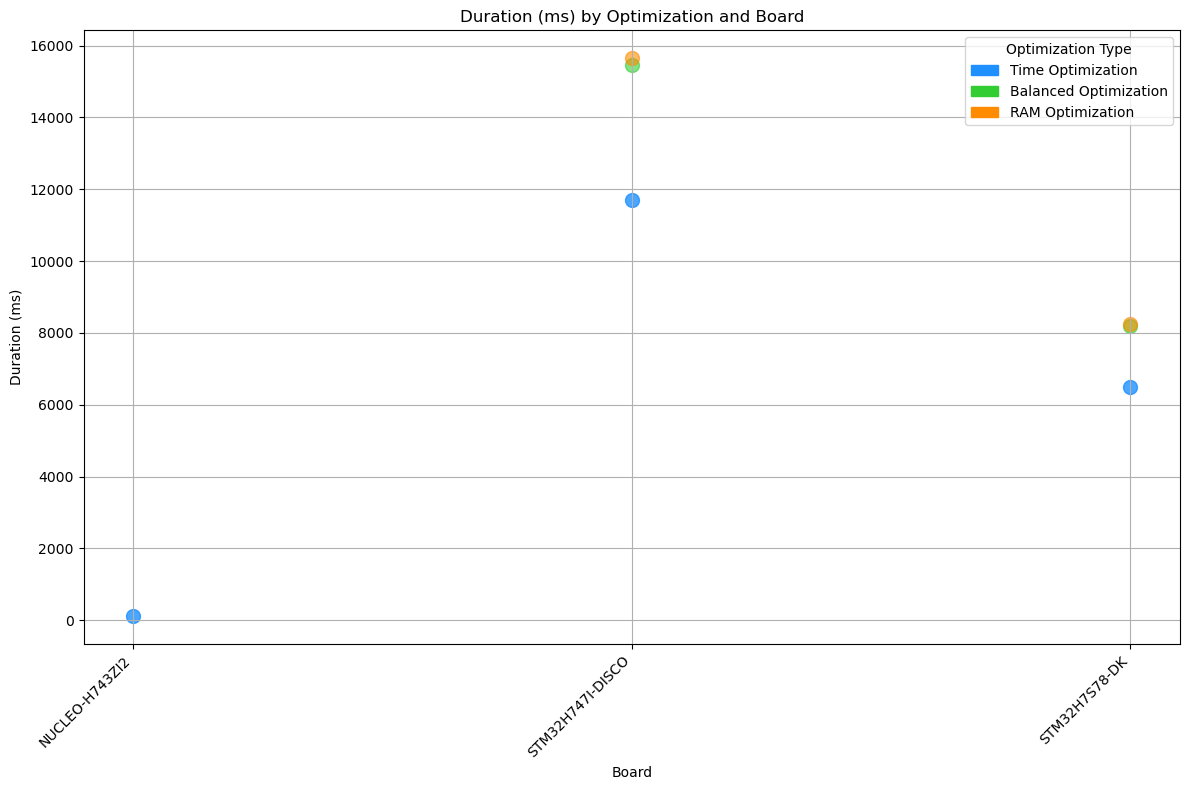

In [4]:
# Drop rows with missing 'optimization' values
df = df.dropna(subset=['optimization'])

# Filter for rows where optimization is 'time'
time_optimization_df = df[df['optimization'] == 'time']
bal_optimization_df = df[df['optimization'] == 'balanced']
ram_optimization_df = df[df['optimization'] == 'ram']

# Ensure that data is sorted by board
time_optimization_df = time_optimization_df.sort_values(by='board')
bal_optimization_df = bal_optimization_df.sort_values(by='board')
ram_optimization_df = ram_optimization_df.sort_values(by='board')

# Initialize a plot
plt.figure(figsize=(12, 8))

# Plot the data
for board in df['board'].unique():
    board_time_data = time_optimization_df[time_optimization_df['board'] == board]
    board_bal_data = bal_optimization_df[bal_optimization_df['board'] == board]
    board_ram_data = ram_optimization_df[ram_optimization_df['board'] == board]
    
    # Plot time optimization with brighter color and larger dots
    plt.scatter([board] * len(board_time_data), board_time_data['duration_ms'], label=None, color='dodgerblue', alpha=0.8, s=100)
    # Plot balanced optimization with natural color and larger dots
    plt.scatter([board] * len(board_bal_data), board_bal_data['duration_ms'], label=None, color='limegreen', alpha=0.6, s=100)
    # Plot ram optimization with darker color and larger dots
    plt.scatter([board] * len(board_ram_data), board_ram_data['duration_ms'], label=None, color='darkorange', alpha=0.6, s=100)

# Create custom legend patches
time_patch = mpatches.Patch(color='dodgerblue', label='Time Optimization')
bal_patch = mpatches.Patch(color='limegreen', label='Balanced Optimization')
ram_patch = mpatches.Patch(color='darkorange', label='RAM Optimization')

# Add legend with custom legend patches
plt.legend(handles=[time_patch, bal_patch, ram_patch], title='Optimization Type')

# Customize the plot
plt.title('Duration (ms) by Optimization and Board')
plt.xlabel('Board')
plt.ylabel('Duration (ms)')
plt.xticks(rotation=45, ha='right')  # Rotate board names on x-axis for better readability
plt.grid(True)
plt.tight_layout()  # Adjust layout to fit x-axis labels
plt.show()